In [1]:
from keras.models import load_model
import matplotlib.pyplot as plt
from utils import *
from keras import backend as K
from keras import metrics
from keras.applications.inception_v3 import InceptionV3,preprocess_input, decode_predictions
from keras.applications.vgg16 import VGG16
import tensorflow as tf
import urllib
import cv2
from keras.preprocessing import image
from keras.models import load_model
%matplotlib inline
from PIL import Image
import numpy as np
import tensorflow as tf
from keras.backend import categorical_crossentropy
from keras.utils.np_utils import to_categorical
from adversarial_tf import Adversarial

Using TensorFlow backend.


In [3]:
img = image.load_img("panda.JPG", target_size=(224,224))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)

In [4]:
black = np.zeros_like(img)

In [5]:
# model = InceptionV3(include_top=True,weights='imagenet')
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [6]:
adv_cls = Adversarial()

In [7]:
model = VGG16(weights='imagenet')
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
adv, perturbation = adv_cls._fgsm_k_iter(model=model,fake_class_idx=700,epsilon=0.1,n_steps=50, img=black, descent=True)

In [ ]:
# desired_predictions = np.zeros(shape=(1,1000))
# desired_predictions[0][233] = 1

In [ ]:
# loss = tf.reduce_mean(K.categorical_crossentropy(labels_placeholder,predictions))
# grad, = tf.gradients(loss,images_placeholder)
# signed_grad = tf.sign(grad)
# scaled_signed_grad = 0.9 * signed_grad
# adv_x = tf.stop_gradient(images_placeholder + scaled_signed_grad)

In [ ]:
#res = fgsm_iter(sess, model, img, desired_predictions,towards=False, eps=0.07, n_steps=10)

## Perturbation

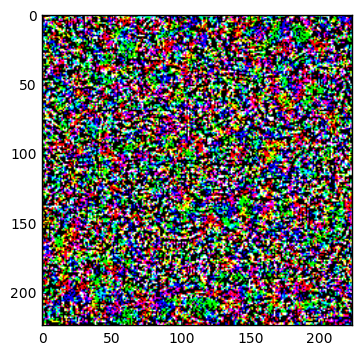

In [15]:
plt.imshow(Image.fromarray((perturbation[0]*10).astype('uint8'),'RGB'))

## Image + Perturbation

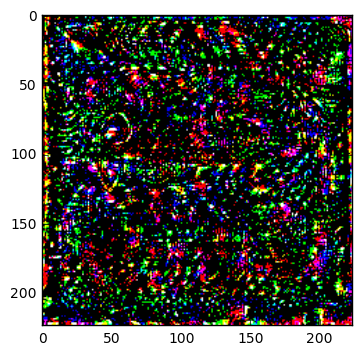

In [10]:
plt.imshow(Image.fromarray(adv[0].astype('uint8'),'RGB'))

In [11]:
decode_predictions(model.predict(adv),top=5)

[[(u'n03887697', u'paper_towel', 0.98868507),
  (u'n15075141', u'toilet_tissue', 0.01118941),
  (u'n02808304', u'bath_towel', 2.5263873e-05),
  (u'n02948072', u'candle', 6.7603473e-06),
  (u'n04209239', u'shower_curtain', 5.4766074e-06)]]

In [12]:
decode_predictions(model.predict(black),top=5)

[[(u'n03788365', u'mosquito_net', 0.016361965),
  (u'n03291819', u'envelope', 0.013312034),
  (u'n15075141', u'toilet_tissue', 0.013128811),
  (u'n01737021', u'water_snake', 0.012501638),
  (u'n04209239', u'shower_curtain', 0.0091519821)]]

In [8]:
from cifar_keras_vgg import VGG
import pandas as pd

In [4]:
vgg = VGG(32,32,3)

In [5]:
x_train, y_train, x_test,y_test = vgg.load_cifar10()

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [35]:
numbers = [x.argmax() for x in y_train]

In [41]:
np.unique(numbers, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000]))

In [50]:
number_of_values_to_remove = 2500

In [51]:
class_number = 6

In [52]:
indexes = []

In [53]:
for ix in range(len(numbers)):
    if number_of_values_to_remove > 0:
        if numbers[ix] == class_number:
            indexes.append(ix)
            number_of_values_to_remove = number_of_values_to_remove - 1

In [54]:
len(np.delete(numbers, indexes))

47500